<a href="https://colab.research.google.com/github/innysik222/Python-Libs/blob/main/Lib_Sklearn_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
Data=boston['data']
target=boston['target']
feature_names=boston['feature_names']
X=pd.DataFrame(Data, columns=feature_names)
y=pd.DataFrame(target, columns=['price'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


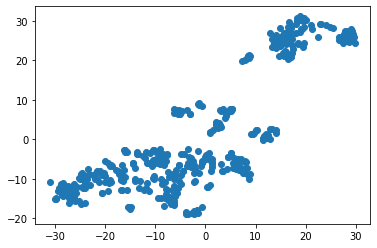

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, max_iter=100, random_state=42)
X_labels=model.fit_predict(X_train)
X_labels_scaled=model.fit_predict(X_train_scaled)
print(X_labels)
print(X_labels_scaled)

[1 0 0 2 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 2 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 1 0 0
 2 0 0 1 1 1 0 0 1 2 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 1 0
 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 2 0 0 1 0 0 2
 0 2 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 2 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 2 0 0 0 2 0 2
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 2 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 2 0 0 0 0 0 0 1 0 1 0 1 0 0 2 0 0 0 0 0 0 0 0 2 2]
[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1

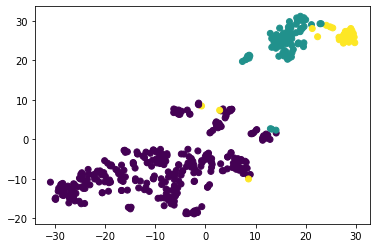

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_labels)
plt.show()

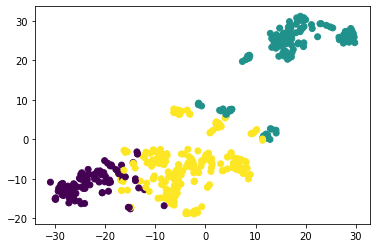

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_labels_scaled)
plt.show()

In [ ]:
y_train.mean()

price    22.796535
dtype: float64

In [ ]:
print(y_train[X_labels_scaled==0].mean())
y_train[X_labels==0].mean()

price    27.788372
dtype: float64


price    25.168687
dtype: float64

In [ ]:
print(y_train[X_labels==1].mean())
y_train[X_labels_scaled==1].mean()

price    17.442105
dtype: float64


price    16.165354
dtype: float64

In [ ]:
print(y_train[X_labels==2].mean())
y_train[X_labels_scaled==2].mean()

price    13.196774
dtype: float64


price    24.958115
dtype: float64

In [79]:
print(X_train['CRIM'].mean())


3.609124628712873


In [85]:
print(X_train.loc[X_labels==0,'CRIM'].mean())
X_train_scaled.loc[X_labels_scaled==0,'CRIM'].mean()

0.40486282828282844


0.008299302991793798

In [84]:
print(X_train.loc[X_labels==1,'CRIM'].mean())
X_train_scaled.loc[X_labels_scaled==1,'CRIM'].mean()

11.745661842105266


1.2180670445620154

In [86]:
print(X_train.loc[X_labels==2,'CRIM'].mean())
X_train.loc[X_labels_scaled==2,'CRIM'].mean()

14.360380322580648


0.42166020942408367

Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [ ]:
X_test_labels=model.fit_predict(X_test)
print(X_test_labels)
X_test_labels_scaled=model.fit_predict(X_test_scaled)
X_test_labels_scaled

[0 0 1 0 1 0 0 0 1 0 0 0 2 0 0 1 0 1 0 1 0 0 0 0 1 1 0 2 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 1 0
 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 2 0 0 1 0 1 2 2 2 0 0]


array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
print('средняя цена жилья в кластере 0: {}'.format(y_test[X_test_labels==0].mean()))
print('средняя преступность в кластере 0: {}'.format(X_test.loc[X_test_labels==0,'CRIM'].mean()))
print('средняя цена жилья в кластере 0: {}'.format(y_test[X_test_labels_scaled==0].mean()))
print('средняя преступность в кластере 0: {}'.format(X_test.loc[X_test_labels_scaled==0,'CRIM'].mean()))

средняя цена жилья в кластере 0: price    23.911594
dtype: float64
средняя преступность в кластере 0: 0.2464211594202899
средняя цена жилья в кластере 0: price    33.871429
dtype: float64
средняя преступность в кластере 0: 0.08618571428571427


In [77]:
print('средняя цена жилья в кластере 1: {}'.format(y_test[X_test_labels==1].mean()))
print('средняя преступность в кластере 1: {}'.format(X_test.loc[X_test_labels==1,'CRIM'].mean()))
print('средняя цена жилья в кластере 1: {}'.format(y_test[X_test_labels_scaled==1].mean()))
print('средняя преступность в кластере 1: {}'.format(X_test.loc[X_test_labels_scaled==1,'CRIM'].mean()))

средняя цена жилья в кластере 1: price    17.392308
dtype: float64
средняя преступность в кластере 1: 8.469301923076923
средняя цена жилья в кластере 1: price    21.55283
dtype: float64
средняя преступность в кластере 1: 0.25200716981132076


In [ ]:
print('средняя цена жилья в кластере 2: {}'.format(y_test[X_test_labels==2].mean()))
print('средняя преступность в кластере 2: {}'.format(X_test.loc[X_test_labels==2,'CRIM'].mean()))
print('средняя цена жилья в кластере 2: {}'.format(y_test[X_test_labels_scaled==2].mean()))
print('средняя преступность в кластере 2: {}'.format(X_test.loc[X_test_labels_scaled==2,'CRIM'].mean()))

средняя цена жилья в кластере 2: price    12.814286
dtype: float64
средняя преступность в кластере 2: 19.021665714285714
средняя цена жилья в кластере 2: price    16.437143
dtype: float64
средняя преступность в кластере 2: 10.165531142857143
